In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

path = './records-for-2014.csv'
df = pd.read_csv(path)
print('属性值如下：')
print(df.columns.values)
print('前五列数据如下：')
df.head()

属性值如下：
['Agency' 'Create Time' 'Area Id' 'Beat' 'Priority' 'Incident Type Id'
 'Incident Type Description' 'Event Number' 'Closed Time' 'Location 1'
 'Zip Codes']
前五列数据如下：


,Agency,Create Time,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes
0,OP,2014-01-01T00:00:00.000,1.0,02X,2,415GS,415 GUNSHOTS,LOP140101000001,2014-01-01T03:22:08.000,"{'human_address': '{""address"": ""LINDEN ST"", ""c...",NaN
1,OP,2014-01-01T00:00:00.000,2.0,26Y,2,415GS,415 GUNSHOTS,LOP140101000002,2014-01-01T02:56:31.000,"{'human_address': '{""address"": ""AV&INTERNATION...",NaN
2,OP,2014-01-01T00:00:00.000,2.0,30Y,2,415GS,415 GUNSHOTS,LOP140101000004,2014-01-01T00:49:53.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",NaN
3,OP,2014-01-01T00:00:00.000,2.0,30Y,2,415GS,415 GUNSHOTS,LOP140101000005,2014-01-01T02:51:11.000,"{'human_address': '{""address"": ""MACARTHUR BLVD...",NaN
4,OP,2014-01-01T00:01:04.000,2.0,35X,2,CODE7,SUBJECT ARMED WITH W,LOP140101000010,2014-01-01T05:33:22.000,"{'human_address': '{""address"": ""AV&DOWLING ST""...",NaN


In [3]:
path1 = './records-for-2011.csv'
path2 = './records-for-2012.csv'
path3 = './records-for-2013.csv'
path4 = './records-for-2014.csv'
path5 = './records-for-2015.csv'
path6 = './records-for-2016.csv'

#读取数据
data2011 = pd.read_csv(path1,encoding='utf-8')
data2012 = pd.read_csv(path2,encoding='utf-8')
data2013 = pd.read_csv(path3,encoding='utf-8')
data2014 = pd.read_csv(path4,encoding='utf-8')
data2015 = pd.read_csv(path5,encoding='utf-8')
data2016 = pd.read_csv(path6,encoding='utf-8')

#处理数据列名属性
data2012.rename(columns={"Location 1": "Location"}, inplace = True)
data2013.rename(columns={"Location ": "Location"}, inplace = True)
data2014.rename(columns={"Location 1": "Location"}, inplace = True)

#获取需要进行频繁模式和关联规则挖掘的数据
data2011_new = data2011[["Agency", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Event Number"]]
data2012_new = data2012[["Agency", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Event Number"]]
data2013_new = data2013[["Agency", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Event Number"]]
data2014_new = data2014[["Agency", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Event Number"]]
data2015_new = data2015[["Agency", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Event Number"]]
data2016_new = data2016[["Agency", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Event Number"]]

#输出查看数据
print(data2011_new)
print(data2012_new)
print(data2013_new)
print(data2014_new)
print(data2015_new)
print(data2016_new)

#获取综合数据
data_all = pd.concat([data2011_new, data2012_new, data2012_new, data2014_new, data2015_new, data2016_new],
                             axis=0)
print("综合数据集有以下属性", data_all.columns)

print(data_all)
#删除空值
data_all = data_all.dropna(how='any')

print(data_all)

data_all_mining = data_all.head(50000)
print(data_all_mining)

       Agency               Location  Area Id Beat  Priority Incident Type Id  \
0          OP        ST&SAN PABLO AV      1.0  06X       1.0             PDOA   
1          OP          ST&HANNAH ST       1.0  07X       1.0            415GS   
2          OP          ST&MARKET ST       1.0  10Y       2.0            415GS   
3          OP           PRENTISS ST       2.0  21Y       2.0            415GS   
4          OP      AV&FOOTHILL BLVD       2.0  20X       1.0            415GS   
...       ...                    ...      ...  ...       ...              ...   
180011     OP            WB 26TH AV       2.0  21X       2.0            415GS   
180012     OP  WERNER 40TH STREET WY      1.0  09X       1.0             PDOA   
180013     OP    WOOD AV&KEMPTON AV       1.0  08X       1.0              918   
180014     OP          WOODSON B ST       2.0  33X       2.0            415GS   
180015    NaN                             NaN  NaN       NaN              NaN   

           Event Number  
0

       Agency                 Location Area Id Beat  Priority  \
0          OP          ST&SAN PABLO AV       1  06X       1.0   
1          OP            ST&HANNAH ST        1  07X       1.0   
2          OP            ST&MARKET ST        1  10Y       2.0   
3          OP             PRENTISS ST        2  21Y       2.0   
4          OP        AV&FOOTHILL BLVD        2  20X       1.0   
...       ...                      ...     ...  ...       ...   
110822     OP   WENDY'S ST&PINE ST          P1  02Y       2.0   
110823     OP  WHITMORE ST&WOOD ST          P1  02Y       2.0   
110824     OP      WHITTLE 69TH AV          P3  26Y       2.0   
110825     OP    WHITTLE LOOMIS CT          P2  19X       2.0   
110826     OP       WYMAN LACEY AV          P3  29X       2.0   

       Incident Type Id     Event Number  
0                  PDOA  LOP110101000001  
1                 415GS  LOP110101000002  
2                 415GS  LOP110101000003  
3                 415GS  LOP110101000005  
4   

In [4]:
min_sup = 0.1
min_conf = 0.5
Property_list = ['location', 'Area Id', 'beat', 'Priority', 'Incident Type Id', 'Event Number']
class Association_rules():
    def __init__(self):
        self.min_sup = min_sup
        self.min_conf = min_conf

    def apriori(self, dataset):             #算法主体
        C1 = self.C1_generation(dataset)        #生成单元数候选项集
        dataset = [set(data) for data in dataset]
        F1, sup_rata = self.Ck_low_support_filtering(dataset, C1)
        F = [F1]
        k = 2
        while len(F[k-2]) > 0:
            Ck = self.apriori_gen(F[k-2], k)        #当候选项元素大于2时，合并时检测是否子项集满足频繁
            Fk, support_k = self.Ck_low_support_filtering(dataset, Ck)      #过滤支持度低于阈值的项集
            sup_rata.update(support_k)
            F.append(Fk)
            k += 1
        return F, sup_rata

    def C1_generation(self, dataset):       #生成单元数候选项集
        C1 = []
        progress = ProgressBar()
        for data in progress(dataset):
            for item in data:
                if [item] not in C1:
                    C1.append([item])
        return [frozenset(item) for item in C1]

    def Ck_low_support_filtering(self, dataset, Ck):        #过滤支持度低于阈值的项集
        Ck_count = dict()
        for data in dataset:
            for cand in Ck:
                if cand.issubset(data):
                    if cand not in Ck_count:
                        Ck_count[cand] = 1
                    else:
                        Ck_count[cand] += 1

        num_items = float(len(dataset))
        return_list = []
        sup_rata = dict()
        # 过滤非频繁项集
        for key in Ck_count:
            support  = Ck_count[key] / num_items
            if support >= self.min_sup:
                return_list.insert(0, key)
            sup_rata[key] = support
        return return_list, sup_rata

    def apriori_gen(self, Fk, k):       #当候选项元素大于2时，合并时检测是否子项集满足频繁
        return_list = []
        len_Fk = len(Fk)

        for i in range(len_Fk):
            for j in range(i+1, len_Fk):
                # 第k-2个项相同时，将两个集合合并
                F1 = list(Fk[i])[:k-2]
                F2 = list(Fk[j])[:k-2]
                F1.sort()
                F2.sort()
                if F1 == F2:
                    return_list.append(Fk[i] | Fk[j])
        return return_list

    def generate_rules(self, F, sup_rata):
        """
        产生强关联规则算法实现
        基于Apriori算法，首先从一个频繁项集开始，接着创建一个规则列表，
        其中规则右部只包含一个元素，然后对这些规则进行测试。
        接下来合并所有的剩余规则列表来创建一个新的规则列表，
        其中规则右部包含两个元素。这种方法称作分级法。
        :param F: 频繁项集
        :param sup_rata: 频繁项集对应的支持度
        :return: 强关联规则列表
        """
        strong_rules_list = []
        for i in range(1, len(F)):
            for freq_set in F[i]:
                H1 = [frozenset([item]) for item in freq_set]
                # 只获取有两个或更多元素的集合
                if i > 1:
                    self.rules_from_reasoned_item(freq_set, H1, sup_rata, strong_rules_list)
                else:
                    self.cal_conf(freq_set, H1, sup_rata, strong_rules_list)
        return strong_rules_list

    def rules_from_reasoned_item(self, freq_set, H, sup_rata, strong_rules_list):
        """
        H->出现在规则右部的元素列表
        """
        m = len(H[0])
        if len(freq_set) > (m+1):
            Hmp1 = self.apriori_gen(H, m+1)
            Hmp1 = self.cal_conf(freq_set, Hmp1, sup_rata, strong_rules_list)
            if len(Hmp1) > 1:
                self.rules_from_reasoned_item(freq_set, Hmp1, sup_rata, strong_rules_list)

    def cal_conf(self, freq_set, H, sup_rata, strong_rules_list):          #评估规则
        prunedH = []
        for reasoned_item in H:
            sup = sup_rata[freq_set]
            conf = sup / sup_rata[freq_set - reasoned_item]
            lift = conf / sup_rata[reasoned_item]
            jaccard = sup / (sup_rata[freq_set - reasoned_item] + sup_rata[reasoned_item] - sup)
            if conf >= self.min_conf:
                strong_rules_list.append((freq_set-reasoned_item, reasoned_item, sup, conf, lift, jaccard))
                prunedH.append(reasoned_item)
        return prunedH

In [7]:
from progressbar import *
import os
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
result_path = './results'
def mining():
    out_path = result_path
    association = Association_rules()
    rows = data_all_mining.values.tolist()

    # 将数据转为数据字典存储
    dataset = []
    feature_names = ["Agency", "Location", "Area Id", "Beat", "Priority", "Incident Type Id", "Event Number"]
    for data_line in rows:
        data_set = []
        for i, value in enumerate(data_line):
            if not value:
                data_set.append((feature_names[i], 'NA'))
            else:
                data_set.append((feature_names[i], value))
        dataset.append(data_set)

    # 获取频繁项集
    freq_set, sup_rata = association.apriori(dataset)
    sup_rata_out = sorted(sup_rata.items(), key=lambda d: d[1], reverse=True)
    print("sup_rata ", sup_rata)
    # 获取强关联规则列表
    strong_rules_list = association.generate_rules(freq_set, sup_rata)
    strong_rules_list = sorted(strong_rules_list, key=lambda x: x[3], reverse=True)
    print("strong_rules_list ", strong_rules_list)

    # 将频繁项集输出到结果文件
    freq_set_file = open(os.path.join(out_path, 'frequent_item.json'), 'w')
    for (key, value) in sup_rata_out:
        result_dict = {'set': None, 'sup': None}
        set_result = list(key)
        sup_result = value
        if sup_result < min_sup:
            continue
        result_dict['set'] = set_result
        result_dict['sup'] = sup_result
        json_str = json.dumps(result_dict, ensure_ascii=False)
        freq_set_file.write(json_str + '\n')
    freq_set_file.close()

    # 将关联规则输出到结果文件
    rules_file = open(os.path.join(out_path, 'related_rule.json'), 'w')
    for result in strong_rules_list:
        result_dict = {'X_set': None, 'Y_set': None, 'sup': None, 'conf': None, 'lift': None, 'jaccard': None}
        X_set, Y_set, sup, conf, lift, jaccard = result
        result_dict['X_set'] = list(X_set)
        result_dict['Y_set'] = list(Y_set)
        result_dict['sup'] = sup
        result_dict['conf'] = conf
        result_dict['lift'] = lift
        result_dict['jaccard'] = jaccard

        json_str = json.dumps(result_dict, ensure_ascii=False)
        rules_file.write(json_str + '\n')
    rules_file.close()

mining()

100% |########################################################################|
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



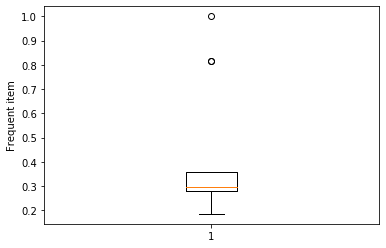

No handles with labels found to put in legend.


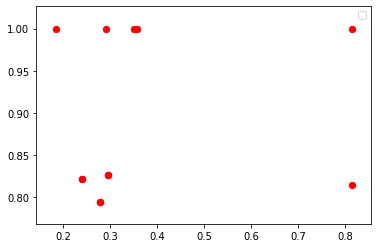

In [3]:
import json
import matplotlib.pyplot as plt
#结果可视化
with open("./results/frequent_item.json") as f1:
    freq = [json.loads(each) for each in f1.readlines()]

with open("./results/related_rule.json") as f2:
    rules = [json.loads(each) for each in f2.readlines()]

freq_sup = [each["sup"] for each in freq]
plt.boxplot(freq_sup)
plt.ylabel("Frequent item")
plt.show()

rules_sup = [each["sup"] for each in rules]
rules_conf = [each["conf"] for each in rules]


plt.scatter(rules_sup, rules_conf, marker='o', color='red', s=40)
plt.xlabel = 'Sup'
plt.ylabel = 'Conf'
plt.legend(loc='best')
plt.show()
